In [1]:
import requests
import json
import pandas as pd
import datetime
import time as tt
import numpy as np
import re
from operator import itemgetter
time = str(datetime.datetime.now().time())
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
font = {'size' : 30}

plt.rc('font', **font)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [2]:
scorecard = pd.read_csv("Scorecard.csv")

In [3]:
scorecard.head(50)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,0,3,4,1,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,383.0,470.0,360.0,480.0,370.0,457.0,427.0,420.0,414.0,16.0,19.0,14.0,20.0,15.0,18.0,NaN,NaN,18.0,17.0,17.0,NaN,850.0,850.0,0.0446,0.0023,0.0094,0.0000,0.0000,0.0164,0.0634,0.0000,0.1268,0.1432,0.0587,0.0000,0.0188,0.0000,0.0235,0.0423,0.0,0.1009,0.0094,0.0000,0.0000,0.0000,0.0000,0.0000,0.0188,0.000,0.0282,0.0282,0.0516,0.0399,0.0000,0.0000,0.0000,0.0000,0.0258,0.0000,0.1479,0.0000,0.0,4505.0,0.0340,0.9216,0.0058,0.0018,0.0022,0.0018,0.0000,0.0062,0.0266,0.0626,1,13435.0,NaN,13075.0,12458.0,15857.0,16022.0,14646.0,NaN,NaN,NaN,NaN,NaN,0.7249,0.5779,NaN,0.3077,NaN,0.8159,0.0877,29900,0.453,35000,361.891446885773,0.2458495231,NaN,0.3303
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,0,3,4,1,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,520.0,630.0,520.0,668.0,NaN,NaN,575.0,594.0,NaN,22.0,28.0,22.0,30.0,19.0,26.0,NaN,NaN,25.0,26.0,23.0,NaN,1147.0,1147.0,0.0000,0.0000,0.0000,0.0009,0.0426,0.0000,0.0133,0.0000,0.0815,0.0577,0.0000,0.0069,0.0000,0.0000,0.0192,0.0179,0.0,0.0715,0.0124,0.0000,0.0000,0.0000,0.0073,0.0000,0.0174,0.000,0.0870,0.0366,0.0238,0.0408,0.0000,0.0000,0.0000,0.0000,0.0376,0.2231,0.1837,0.0188,0.0,11269.0,0.5863,0.2541,0.0317,0.0595,0.0023,0.0006,0.0389,0.0181,0.0085,0.2671,1,16023.0,NaN,13614.0,14746.0,17601.0,18873.0,18482.0,NaN,NaN,NaN,NaN,NaN,0.3505,0.7864,NaN,0.6071,NaN,0.5218,0.2363,40200,0.669,21500,222.304745944118,0.5199110572,NaN,0.5504
2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,4,2,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2453,0.0000,0.0000,0.0566,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1698,0.0000,0.000,0.0000,0.1321,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3962,0.0000,1.0,308.0,0.2110,0.3409,0.0195,0.0000,0.0000,0.0032,0.0000,0.0000,0.4253,0.5714,1,NaN,8862.0,NaN,NaN,NaN,NaN,NaN,8453.0,12133.0,NaN,NaN,NaN,0.7455,0.6667,NaN,0.6667,NaN,0.8781,0.8571,40100,0.658,23000,237.814379382079,0.2331002331,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,4,1,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,520.0,650.0,550.0,680.0,NaN,NaN,585.0,615.0,NaN,24.0,30.0,24.0,32.0,24.0,29.0,NaN,NaN,27.0,28.0,27.0,NaN,1221.0,1221.0,0.0000,0.0000,0.0000,0.0000,0.0216,0.0000,0.0315,0.0000,0.0216,0.3027,0.0000,0.0162,0.0000,0.0000,0.0126,0.0000,0.0,0.0712,0.0198,0.0000,0.0009,0.0000,0.0072,0.0000,0.0216,0.000,0.0171,0.0000,0.0000,0.0189,0.0000,0.0000,0.0000,0.0000,0.0288,0.1892,0.2072,0.0117,0.0,5829.0,

In [4]:
scorecard.shape

(7593, 123)

In [5]:
scorecard['UNITID'].isnull().sum()

0

In [6]:
scorecard['HIGHDEG'].unique()

array([4, 2, 3, 1, 0])

In [7]:
scorecard['STABBR'].unique()

array(['AL', 'IL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT',
       'NY', 'DE', 'DC', 'VA', 'FL', 'GA', 'HI', 'ID', 'IN', 'TN', 'MI',
       'IA', 'KS', 'MO', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS', 'MT', 'NE',
       'NV', 'NH', 'NJ', 'NC', 'ND', 'OH', 'WV', 'OK', 'OR', 'PA', 'RI',
       'SC', 'SD', 'TX', 'UT', 'VT', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'FM', 'PW', 'VI', 'MH'], dtype=object)

In [8]:
len(scorecard.loc[scorecard['MD_EARN_WNE_P10'].isnull()]) / len(scorecard)

0.15000658501251152

In [9]:
len(scorecard.loc[scorecard['MD_EARN_WNE_P10'] == "PrivacySuppressed"]) / len(scorecard)

0.10167259317792704

In [10]:
#repayment rate over 3 year period
len(scorecard.loc[scorecard['RPY_3YR_RT_SUPP'].isnull()]) / len(scorecard)

0.12208613196365073

In [11]:
len(scorecard.loc[scorecard['RPY_3YR_RT_SUPP'] == "PrivacySuppressed"]) / len(scorecard)

0.06519162386408534

In [12]:
#this monthly payment includes 4.45% interest
len(scorecard.loc[scorecard['GRAD_DEBT_MDN10YR_SUPP'].isnull()]) / len(scorecard)

0.0038193072566837876

In [13]:
len(scorecard.loc[scorecard['GRAD_DEBT_MDN10YR_SUPP'] == "PrivacySuppressed"]) / len(scorecard)

0.20281838535493218

In [14]:
#drop null and privacy suppressed schools

In [15]:
def prepare_df(df):
    new_df = df.loc[df['MD_EARN_WNE_P10'].isnull() == False]
    new_df = new_df.loc[new_df['GRAD_DEBT_MDN10YR_SUPP'].isnull() == False]
    new_df = new_df.loc[new_df['RPY_3YR_RT_SUPP'].isnull() == False]
    new_df = new_df.loc[new_df['RPY_3YR_RT_SUPP'] != "PrivacySuppressed"]
    new_df = new_df.loc[new_df['GRAD_DEBT_MDN10YR_SUPP'] != "PrivacySuppressed"]
    new_df = new_df.loc[new_df['MD_EARN_WNE_P10'] != "PrivacySuppressed"]   
    new_df = new_df[['UNITID','INSTNM', 'CITY','STABBR','MD_EARN_WNE_P10','GRAD_DEBT_MDN10YR_SUPP','RPY_3YR_RT_SUPP']].copy()
    new_df = new_df.reset_index()
    del new_df['index']
    new_df['MD_EARN_WNE_P10'] = pd.to_numeric(new_df['MD_EARN_WNE_P10'], errors='coerce')
    new_df['GRAD_DEBT_MDN10YR_SUPP'] = pd.to_numeric(new_df['GRAD_DEBT_MDN10YR_SUPP'], errors='coerce')
    new_df['RPY_3YR_RT_SUPP'] = pd.to_numeric(new_df['RPY_3YR_RT_SUPP'], errors='coerce')
    return new_df

In [16]:
df = prepare_df(scorecard)

In [17]:
df.shape

(5005, 7)

In [18]:
df.head(50)

,UNITID,INSTNM,CITY,STABBR,MD_EARN_WNE_P10,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP
0,100654,Alabama A & M University,Normal,AL,29900,361.891447,0.245850
1,100663,University of Alabama at Birmingham,Birmingham,AL,40200,222.304746,0.519911
2,100690,Amridge University,Montgomery,AL,40100,237.814379,0.233100
3,100706,University of Alabama in Huntsville,Huntsville,AL,45600,242.984257,0.549003
4,100724,Alabama State University,Montgomery,AL,26700,331.813098,0.196354
5,100751,The University of Alabama,Tuscaloosa,AL,42700,245.569196,0.591143
6,100760,Central Alabama Community College,Alexander City,AL,27200,97.069626,0.263502
7,100812,Athens State University,Athens,AL,38500,191.637031,0.494246
8,100830,Auburn University at Montgomery,Montgomery,AL,33500,229.465027,0.416270
9,100858,Auburn University,Auburn,AL,47100,222.304746,0.731667


In [19]:
df.isnull().sum()

UNITID                    0
INSTNM                    0
CITY                      0
STABBR                    0
MD_EARN_WNE_P10           0
GRAD_DEBT_MDN10YR_SUPP    0
RPY_3YR_RT_SUPP           0
dtype: int64

In [20]:
sorted(df['MD_EARN_WNE_P10'])[::-1][0:5]

[125900, 122600, 120400, 112700, 111600]

In [21]:
sorted(df['GRAD_DEBT_MDN10YR_SUPP'])[::-1][0:5]

[524.74259798437106,
 524.74259798437106,
 506.64802564008301,
 506.64802564008301,
 482.587414299991]

In [22]:
sorted(df['RPY_3YR_RT_SUPP'])[::-1][0:5]

[0.92532467530000007,
 0.92387543250000004,
 0.92182088080000002,
 0.92054263569999994,
 0.92026578069999998]

In [23]:
#new columns for analysis

In [24]:
df['Monthly_Income'] = df['MD_EARN_WNE_P10'] / 12

In [25]:
df['Monthly_Income_Debt_Difference'] = df['Monthly_Income'] - df['GRAD_DEBT_MDN10YR_SUPP']

In [26]:
df['stringid'] = df['UNITID'].apply(str)

In [27]:
df['StateID'] = df[['stringid', 'STABBR']].apply(lambda x: ''.join(x), axis=1)

In [28]:
del df['stringid']

In [29]:
df.head()

,UNITID,INSTNM,CITY,STABBR,MD_EARN_WNE_P10,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,Monthly_Income,Monthly_Income_Debt_Difference,StateID
0,100654,Alabama A & M University,Normal,AL,29900,361.891447,0.245850,2491.666667,2129.775220,100654AL
1,100663,University of Alabama at Birmingham,Birmingham,AL,40200,222.304746,0.519911,3350.000000,3127.695254,100663AL
2,100690,Amridge University,Montgomery,AL,40100,237.814379,0.233100,3341.666667,3103.852287,100690AL
3,100706,University of Alabama in Huntsville,Huntsville,AL,45600,242.984257,0.549003,3800.000000,3557.015743,100706AL
4,100724,Alabama State University,Montgomery,AL,26700,331.813098,0.196354,2225.000000,1893.186902,100724AL


In [30]:
sorted(df['Monthly_Income_Debt_Difference'])[::-1][0:5]

[10334.450682383862,
 9939.0649076384016,
 9831.7080986398323,
 9112.4932647833557,
 9090.3252655521956]

In [31]:
sorted(df['Monthly_Income_Debt_Difference'])[0:5]

[792.572050726876,
 821.06069884908857,
 829.73844806437569,
 887.41972135031961,
 900.96684002213135]

In [32]:
#Histogram Function

In [33]:
def graph_of_monthly_income_difference(df):
    
    xc = df["StateID"]
    col = []
    for x in range(len(xc)):
        col.append(xc[x])  
                
    hpt = []
    hc = df["Monthly_Income_Debt_Difference"]
    for x in range(len(col)):
        hpt.append([hc[x],col[x]])
          
    hpt = sorted(hpt, key=itemgetter(0))[::-1]
    
    new_col = []
    new_hpt = []
    
    for x in range(len(hpt)):
        new_col.append(hpt[x][1])
        new_hpt.append(hpt[x][0])
        
        
    fig = plt.figure(figsize=(50,50))
    ax = fig.add_subplot(111)
    
    h = list(range(0,len(new_col)))
    p = list(new_hpt)
    ax.bar(h, p, align='center', alpha=1)
    ax.set(title='School Ranks by MIDD', xticks=list(range(0,len(new_col))),
       ylabel='USD per month', xlabel='StateID')
    ax.set_xticklabels(new_col)
    fig.autofmt_xdate(rotation="vertical")
    plt.show()
    
    

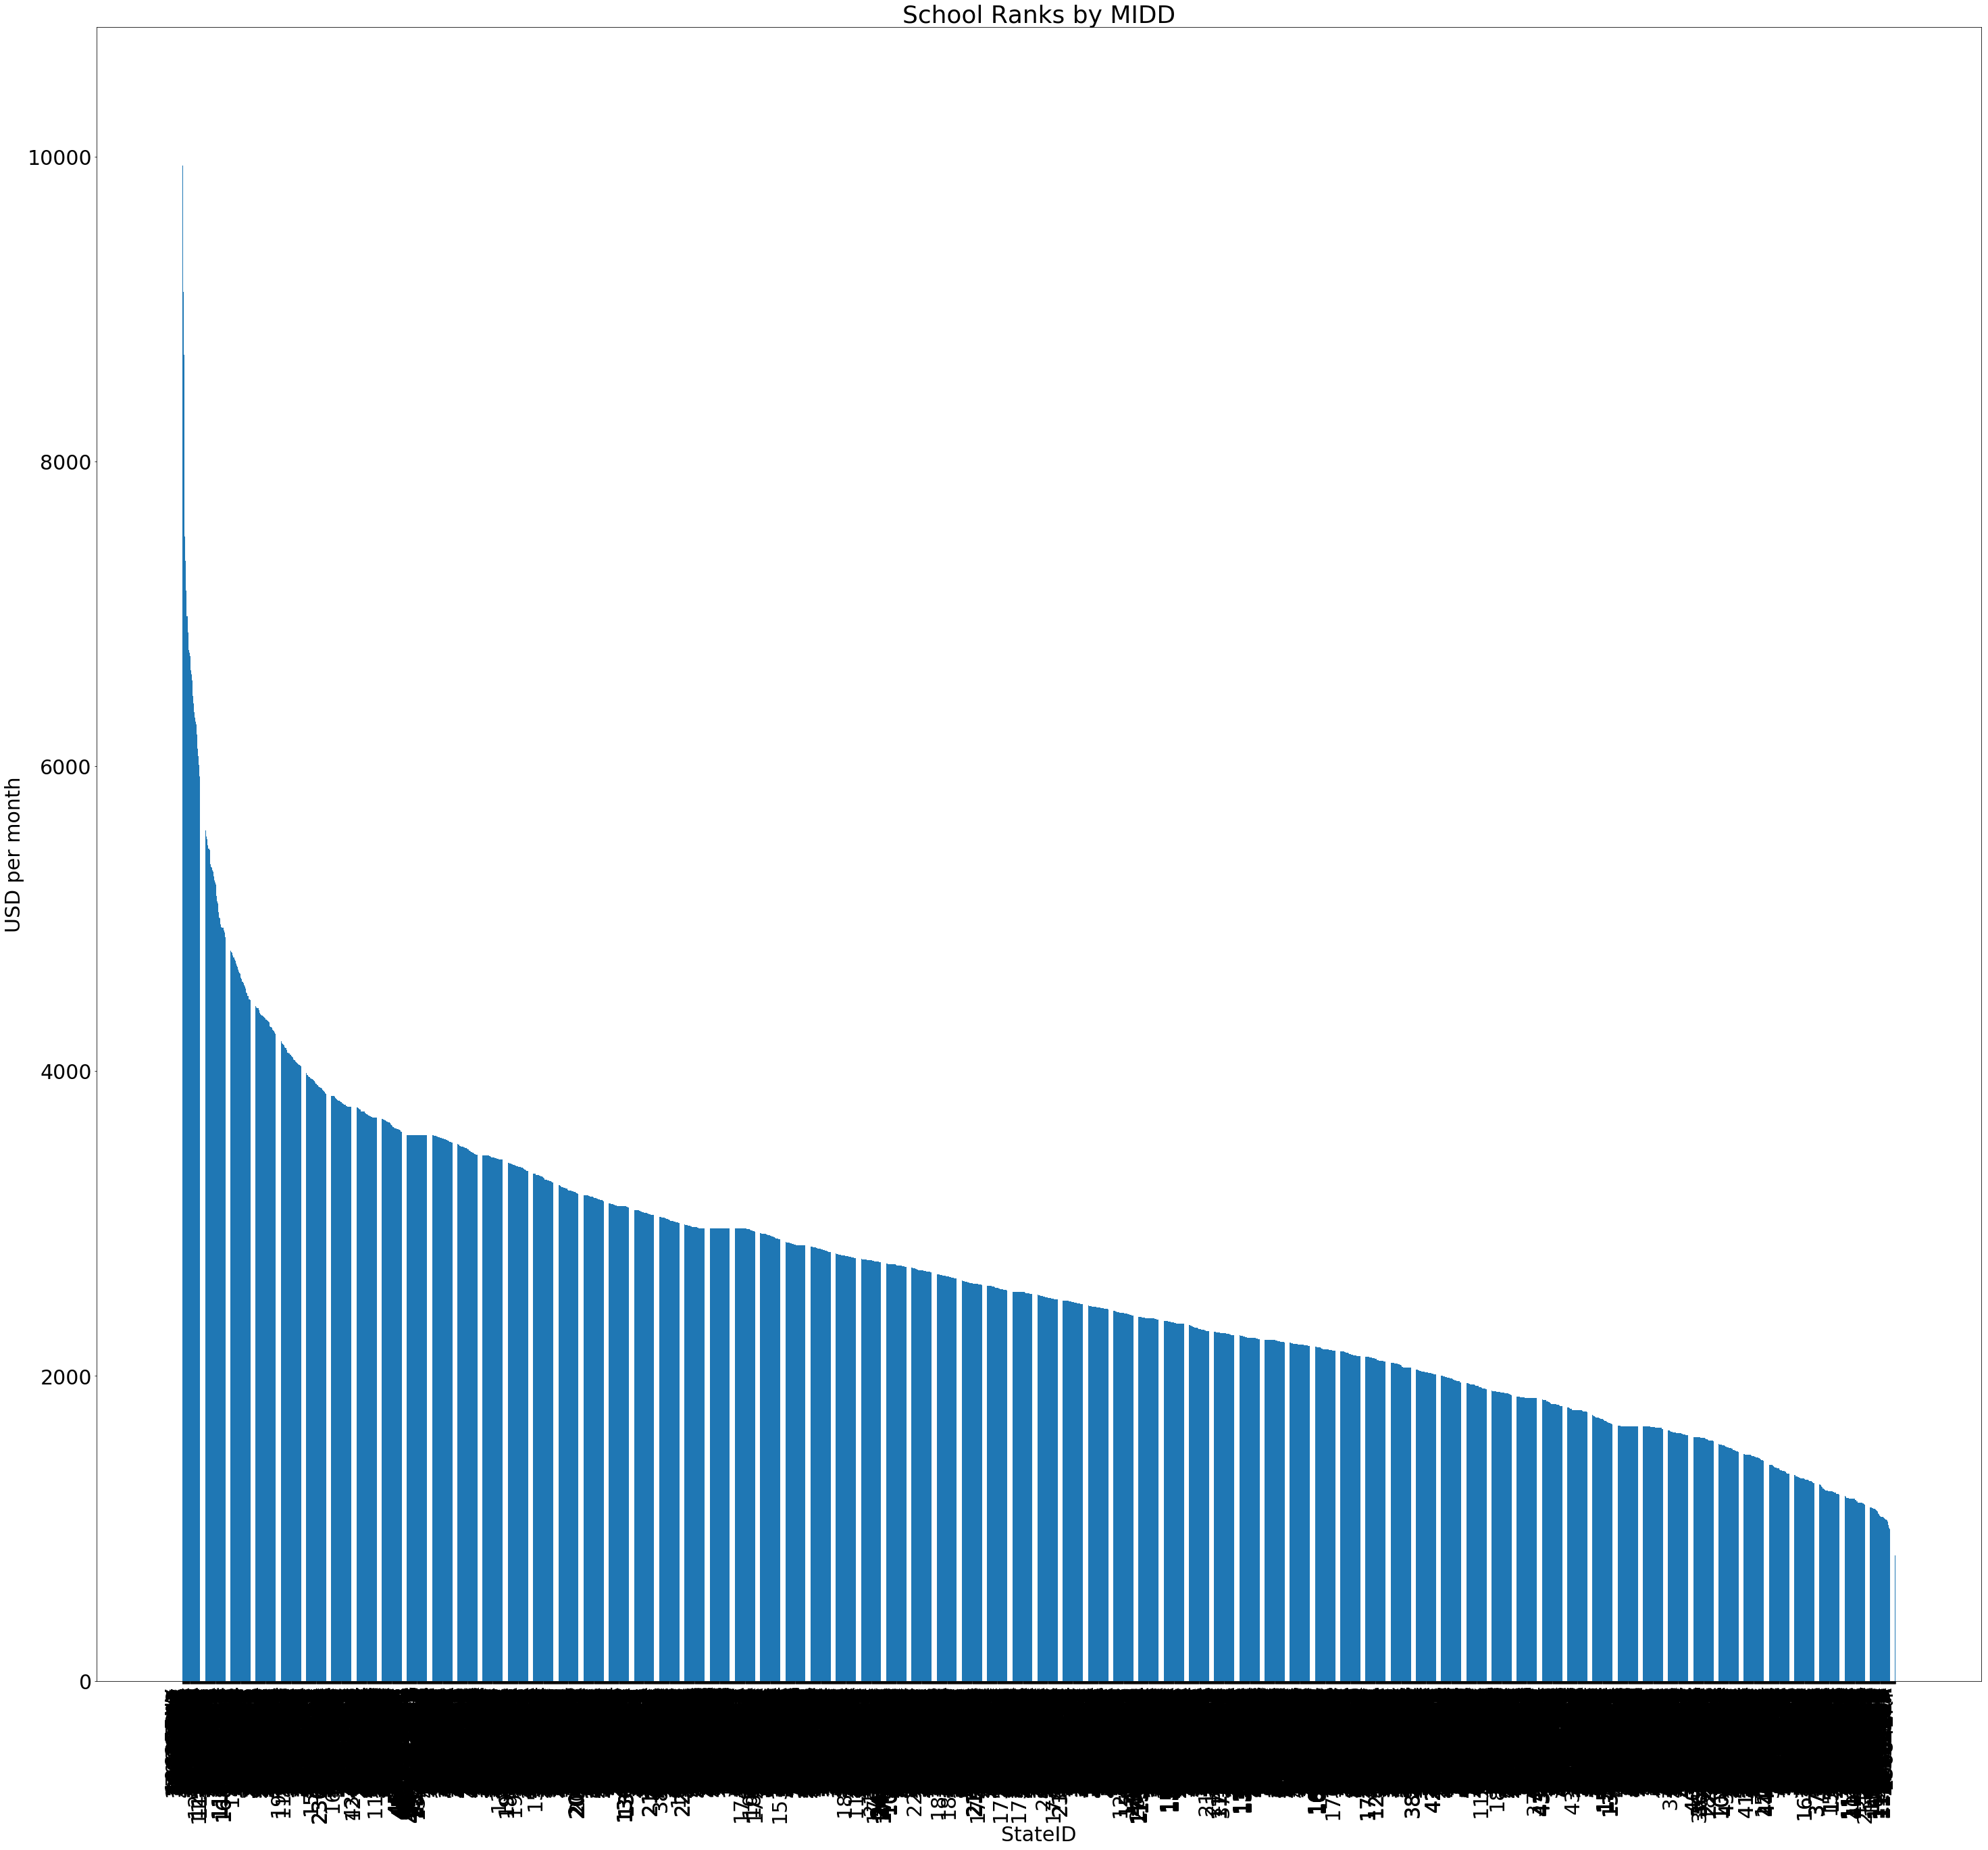

In [34]:
graph_of_monthly_income_difference(df)

In [35]:
len(df.loc[df['STABBR'] == "AL"])

65

In [36]:
def graph_of_monthly_income_difference(df,state="all",section="all"):
    
    if state != "all":
        xc = df.loc[df['STABBR'] == state]
        xc = xc.reset_index()
        new_df = xc
        xc = xc['StateID']
    else:
        xc = df["StateID"]
    col = []
    for x in range(len(xc)):
        col.append(xc[x])  
                
    hpt = []
    if state != "all":
        hc = new_df["Monthly_Income_Debt_Difference"]
    else:
        hc = df["Monthly_Income_Debt_Difference"]
    for x in range(len(col)):
        hpt.append([hc[x],col[x]])
          
    hpt = sorted(hpt, key=itemgetter(0))[::-1]
        
    new_col = []
    new_hpt = []
    
    for x in range(len(hpt)):
        new_col.append(hpt[x][1])
        new_hpt.append(hpt[x][0])
        
    if section != "all":
        new_col = new_col[0:section]
        new_hpt = new_hpt[0:section]      
        
    fig = plt.figure(figsize=(50,50))
    ax = fig.add_subplot(111)
    
    h = list(range(0,len(new_col)))
    p = list(new_hpt)
    ax.bar(h, p, align='center', alpha=1)
    ax.set(title='School Ranks by MIDD', xticks=list(range(0,len(new_col))),
       ylabel='USD per month', xlabel='StateID')
    ax.set_xticklabels(new_col)
    fig.autofmt_xdate(rotation="vertical")
    plt.show()
    
    

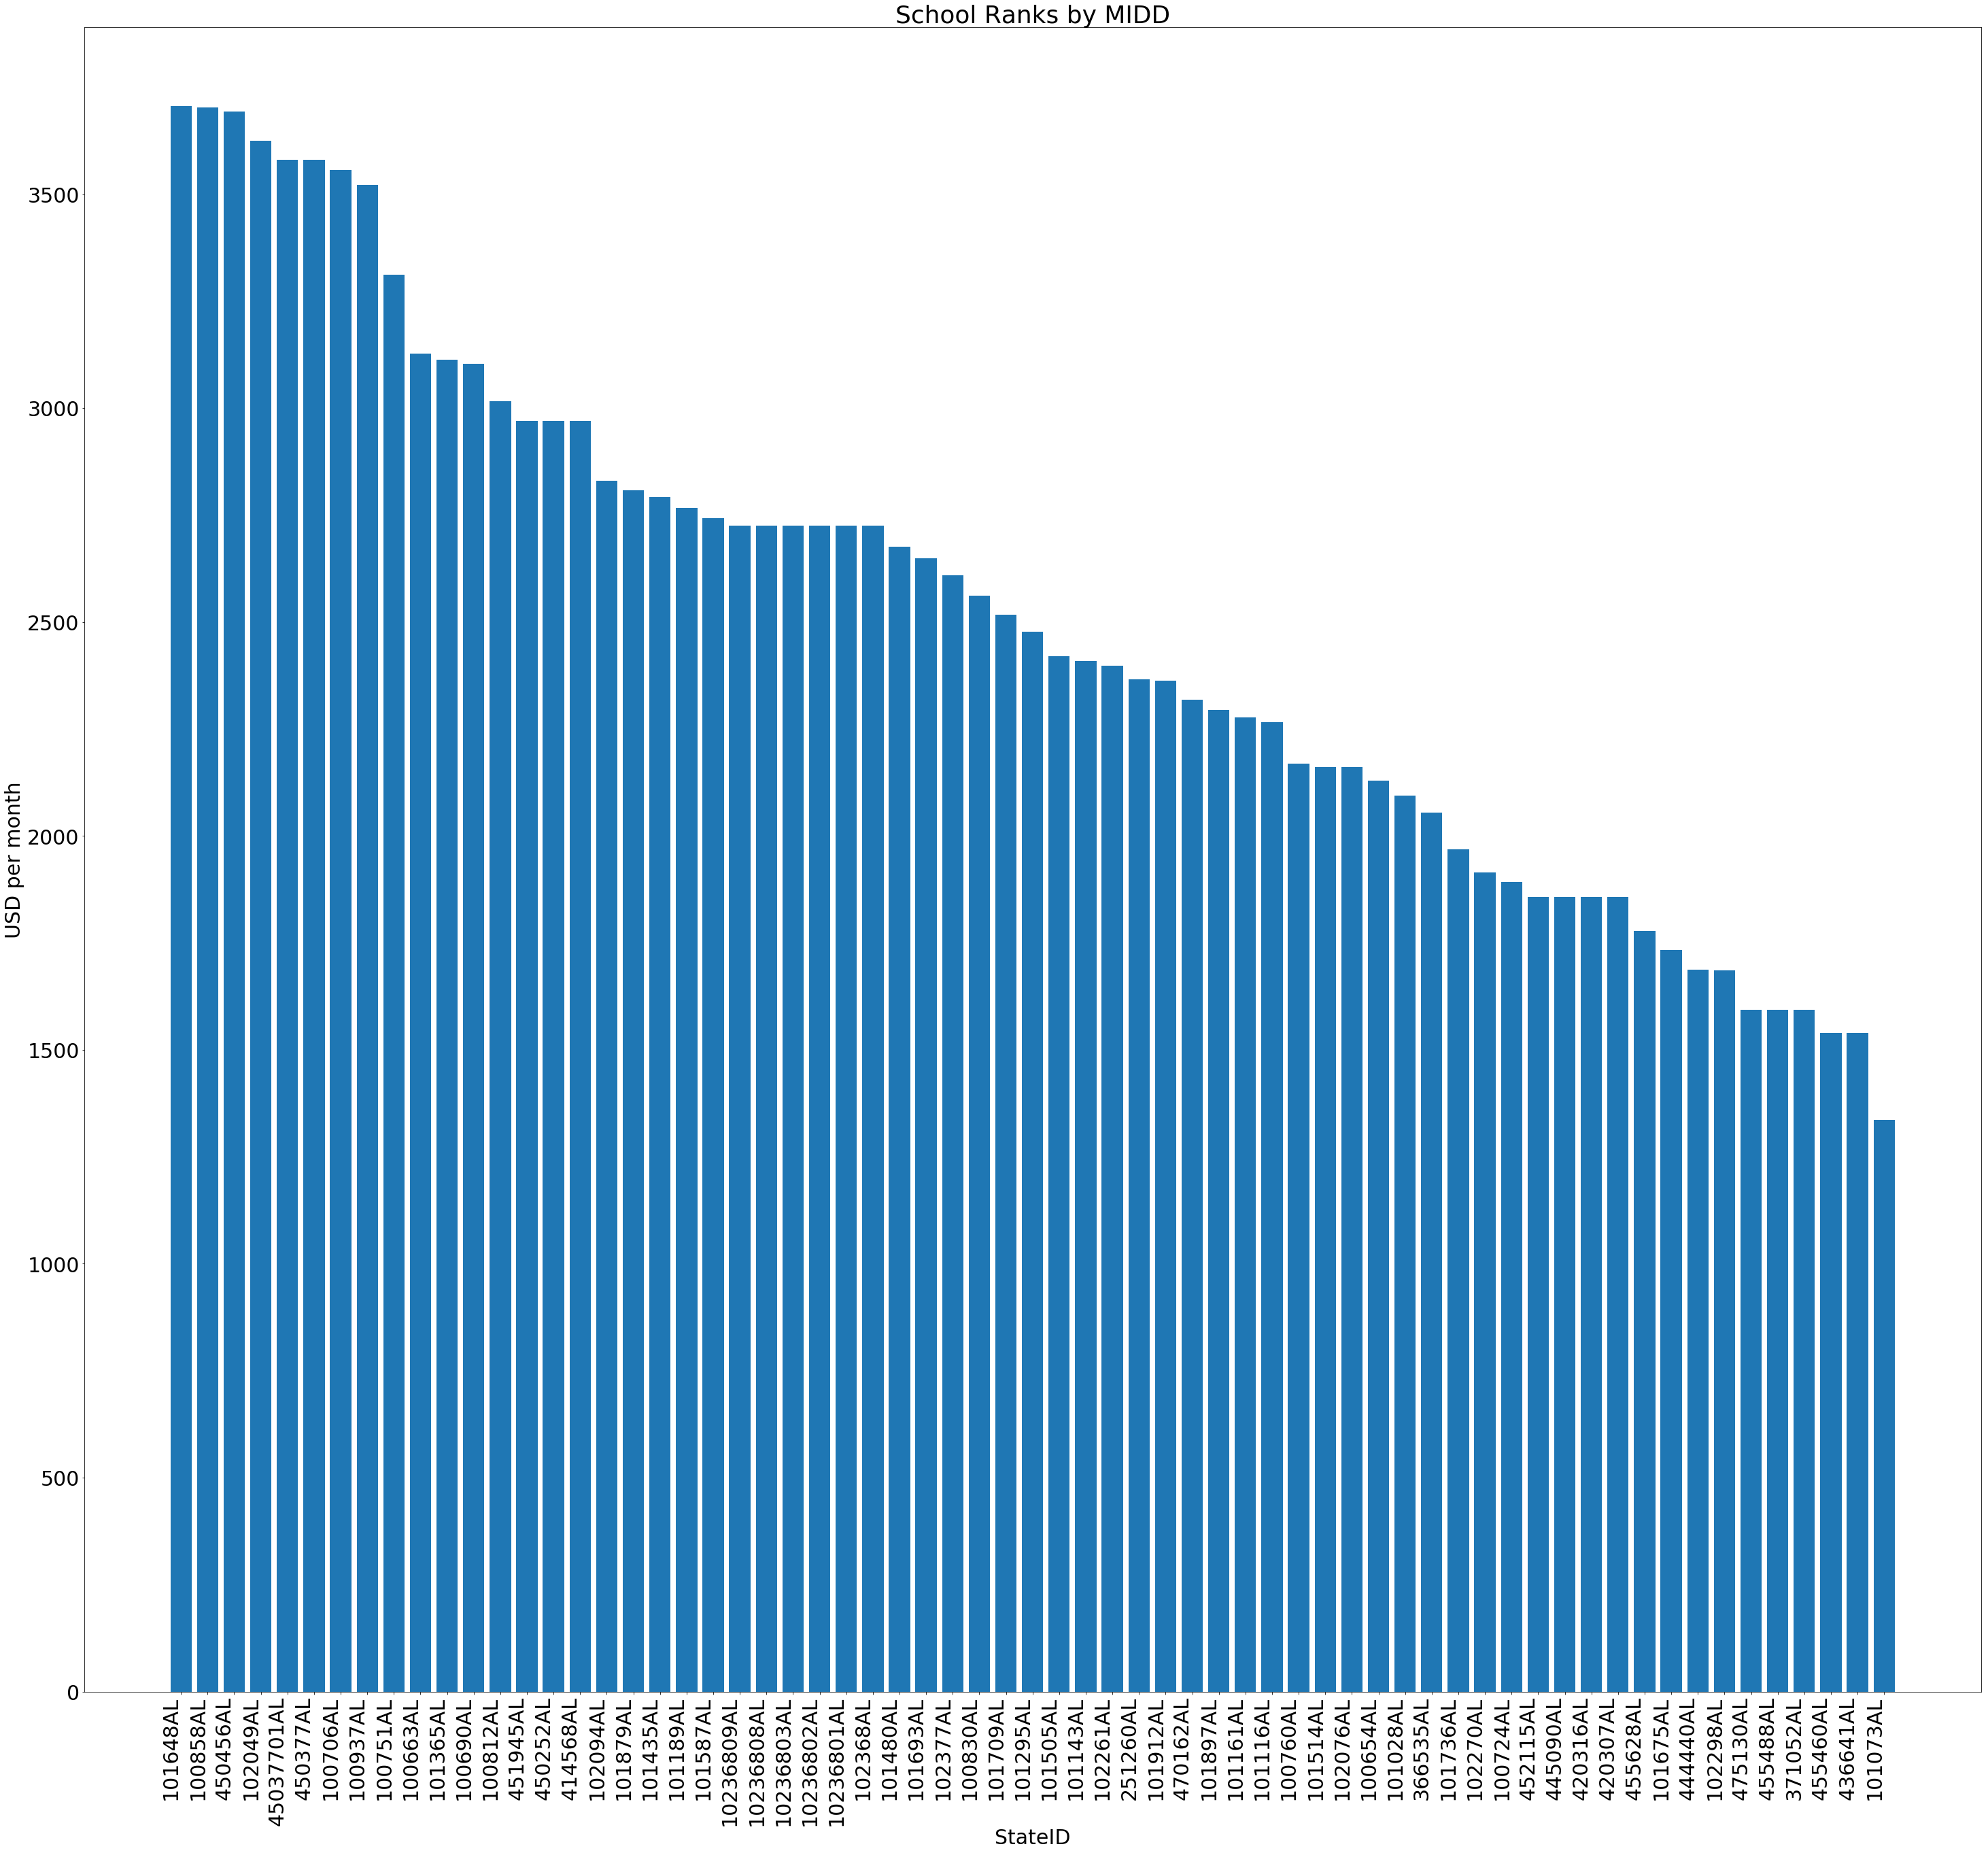

In [37]:
graph_of_monthly_income_difference(df,"AL")

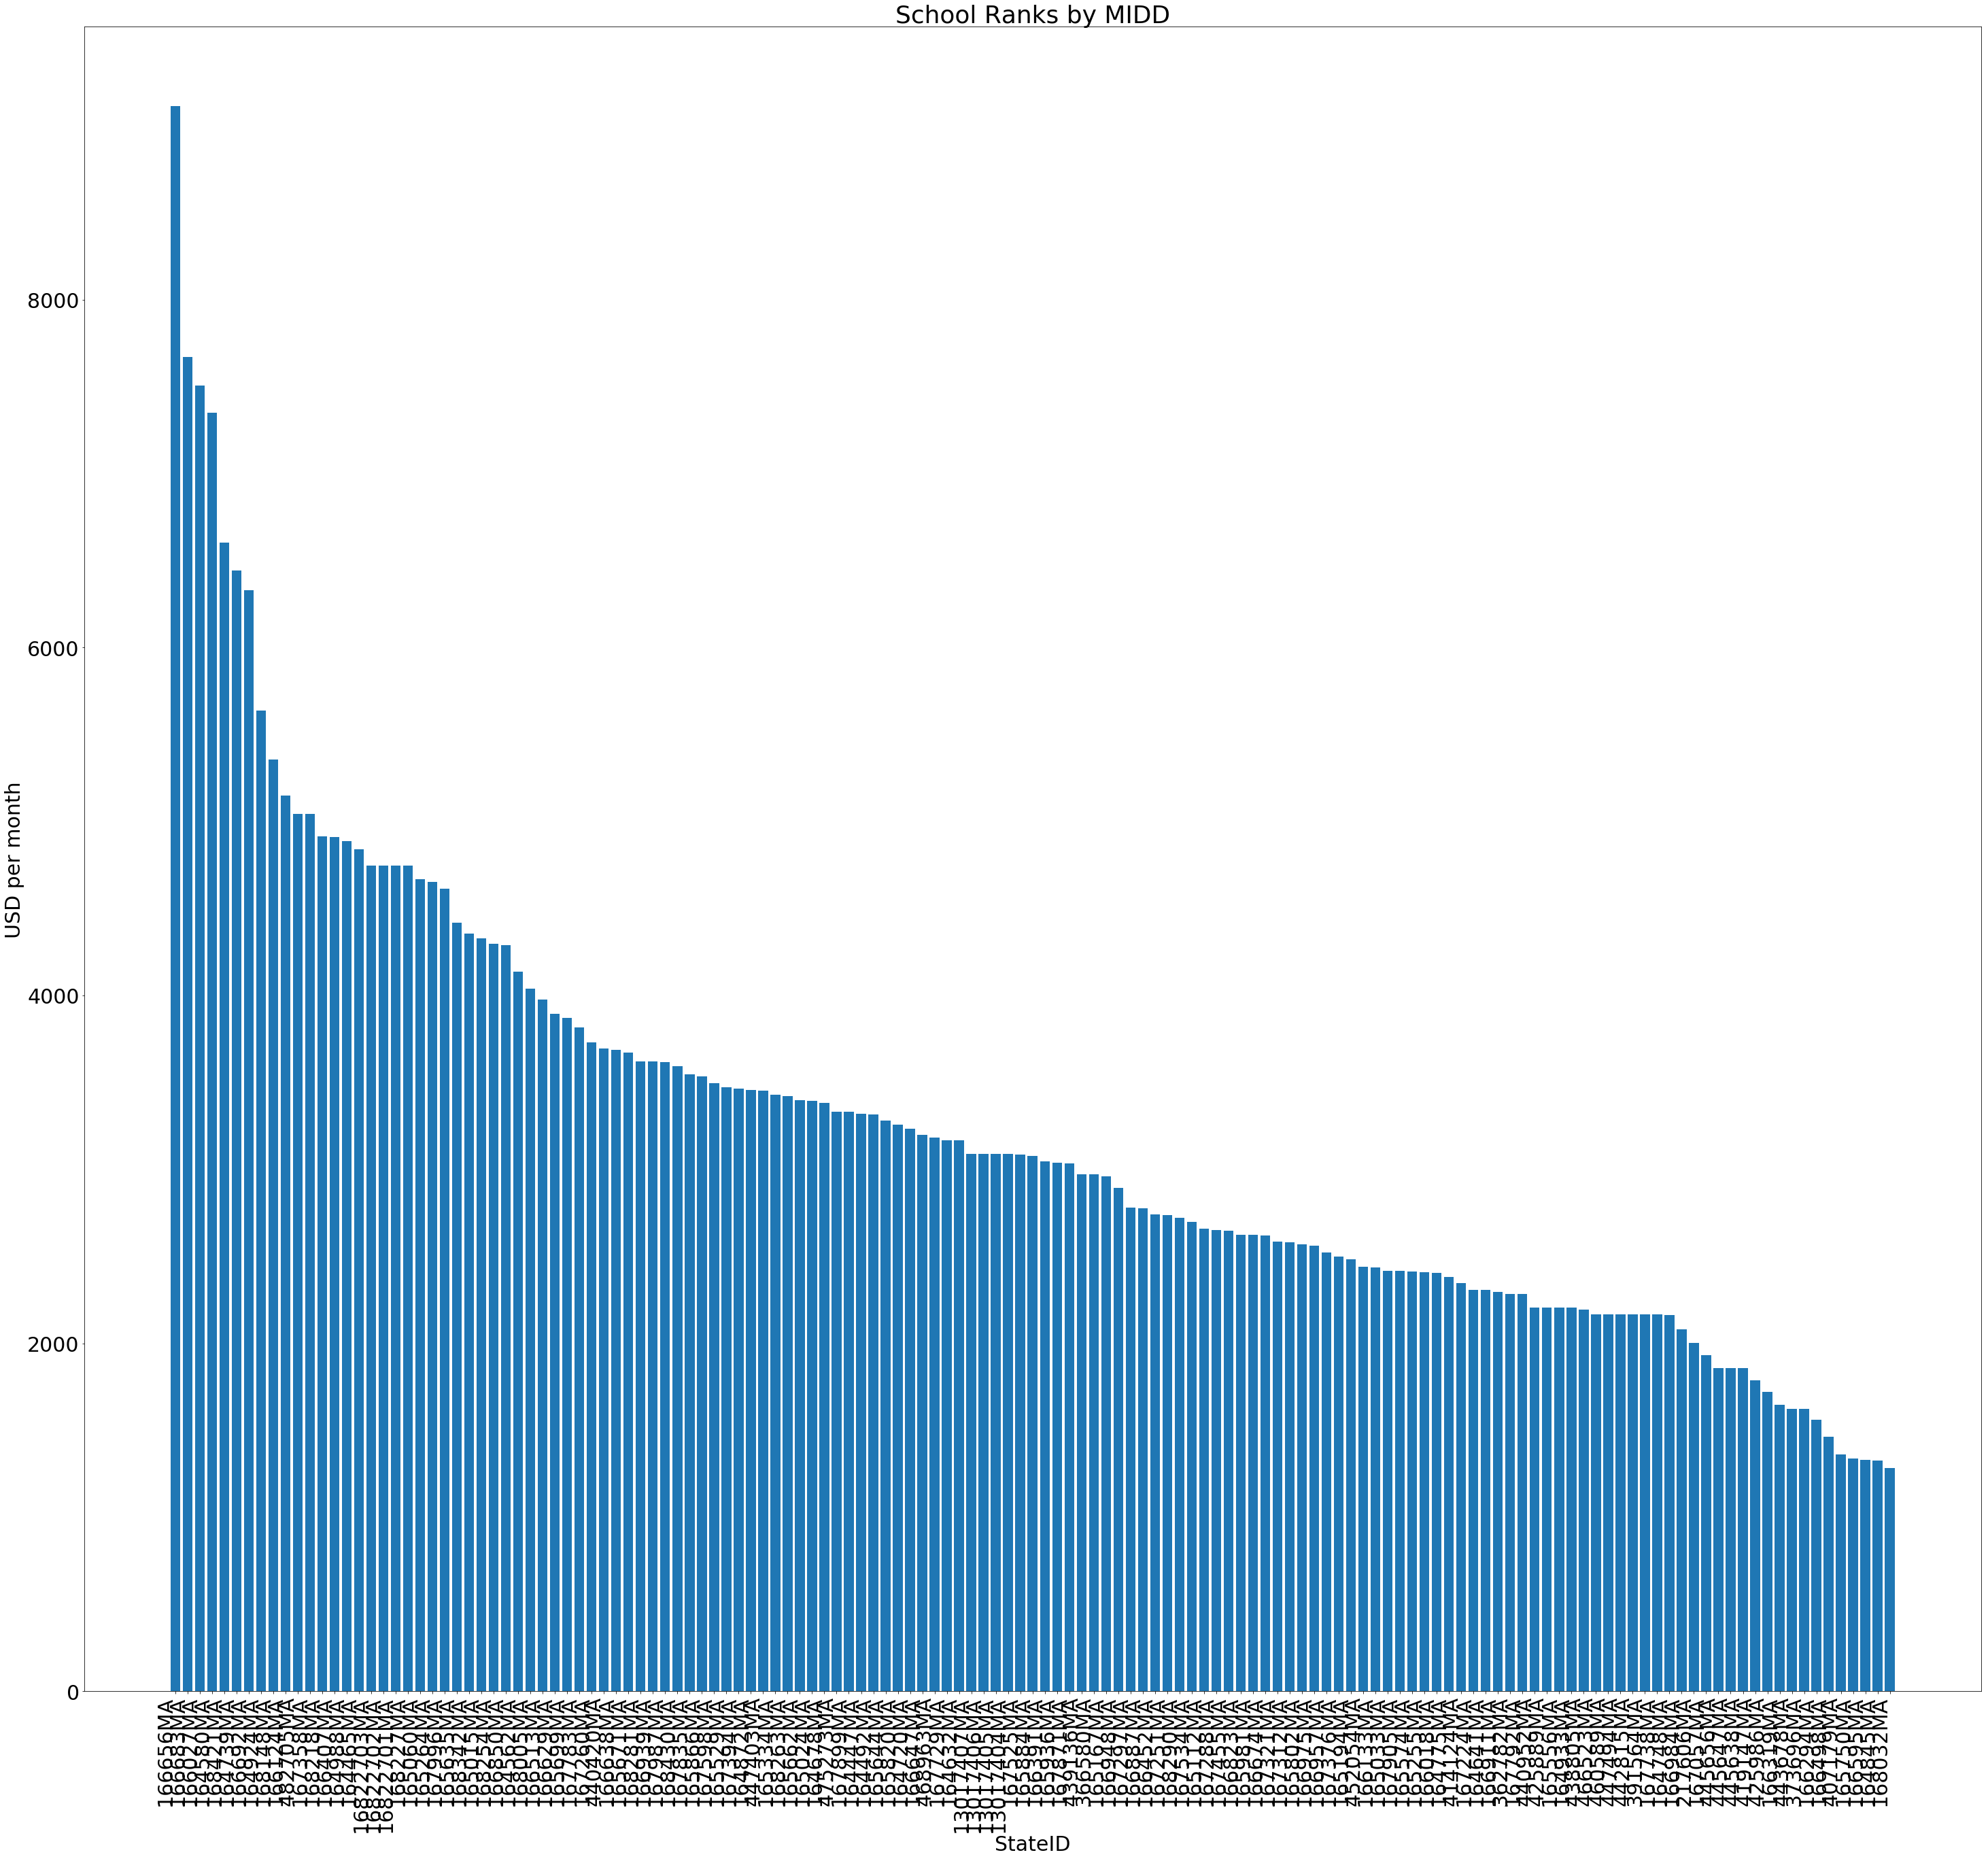

In [38]:
graph_of_monthly_income_difference(df,"MA")

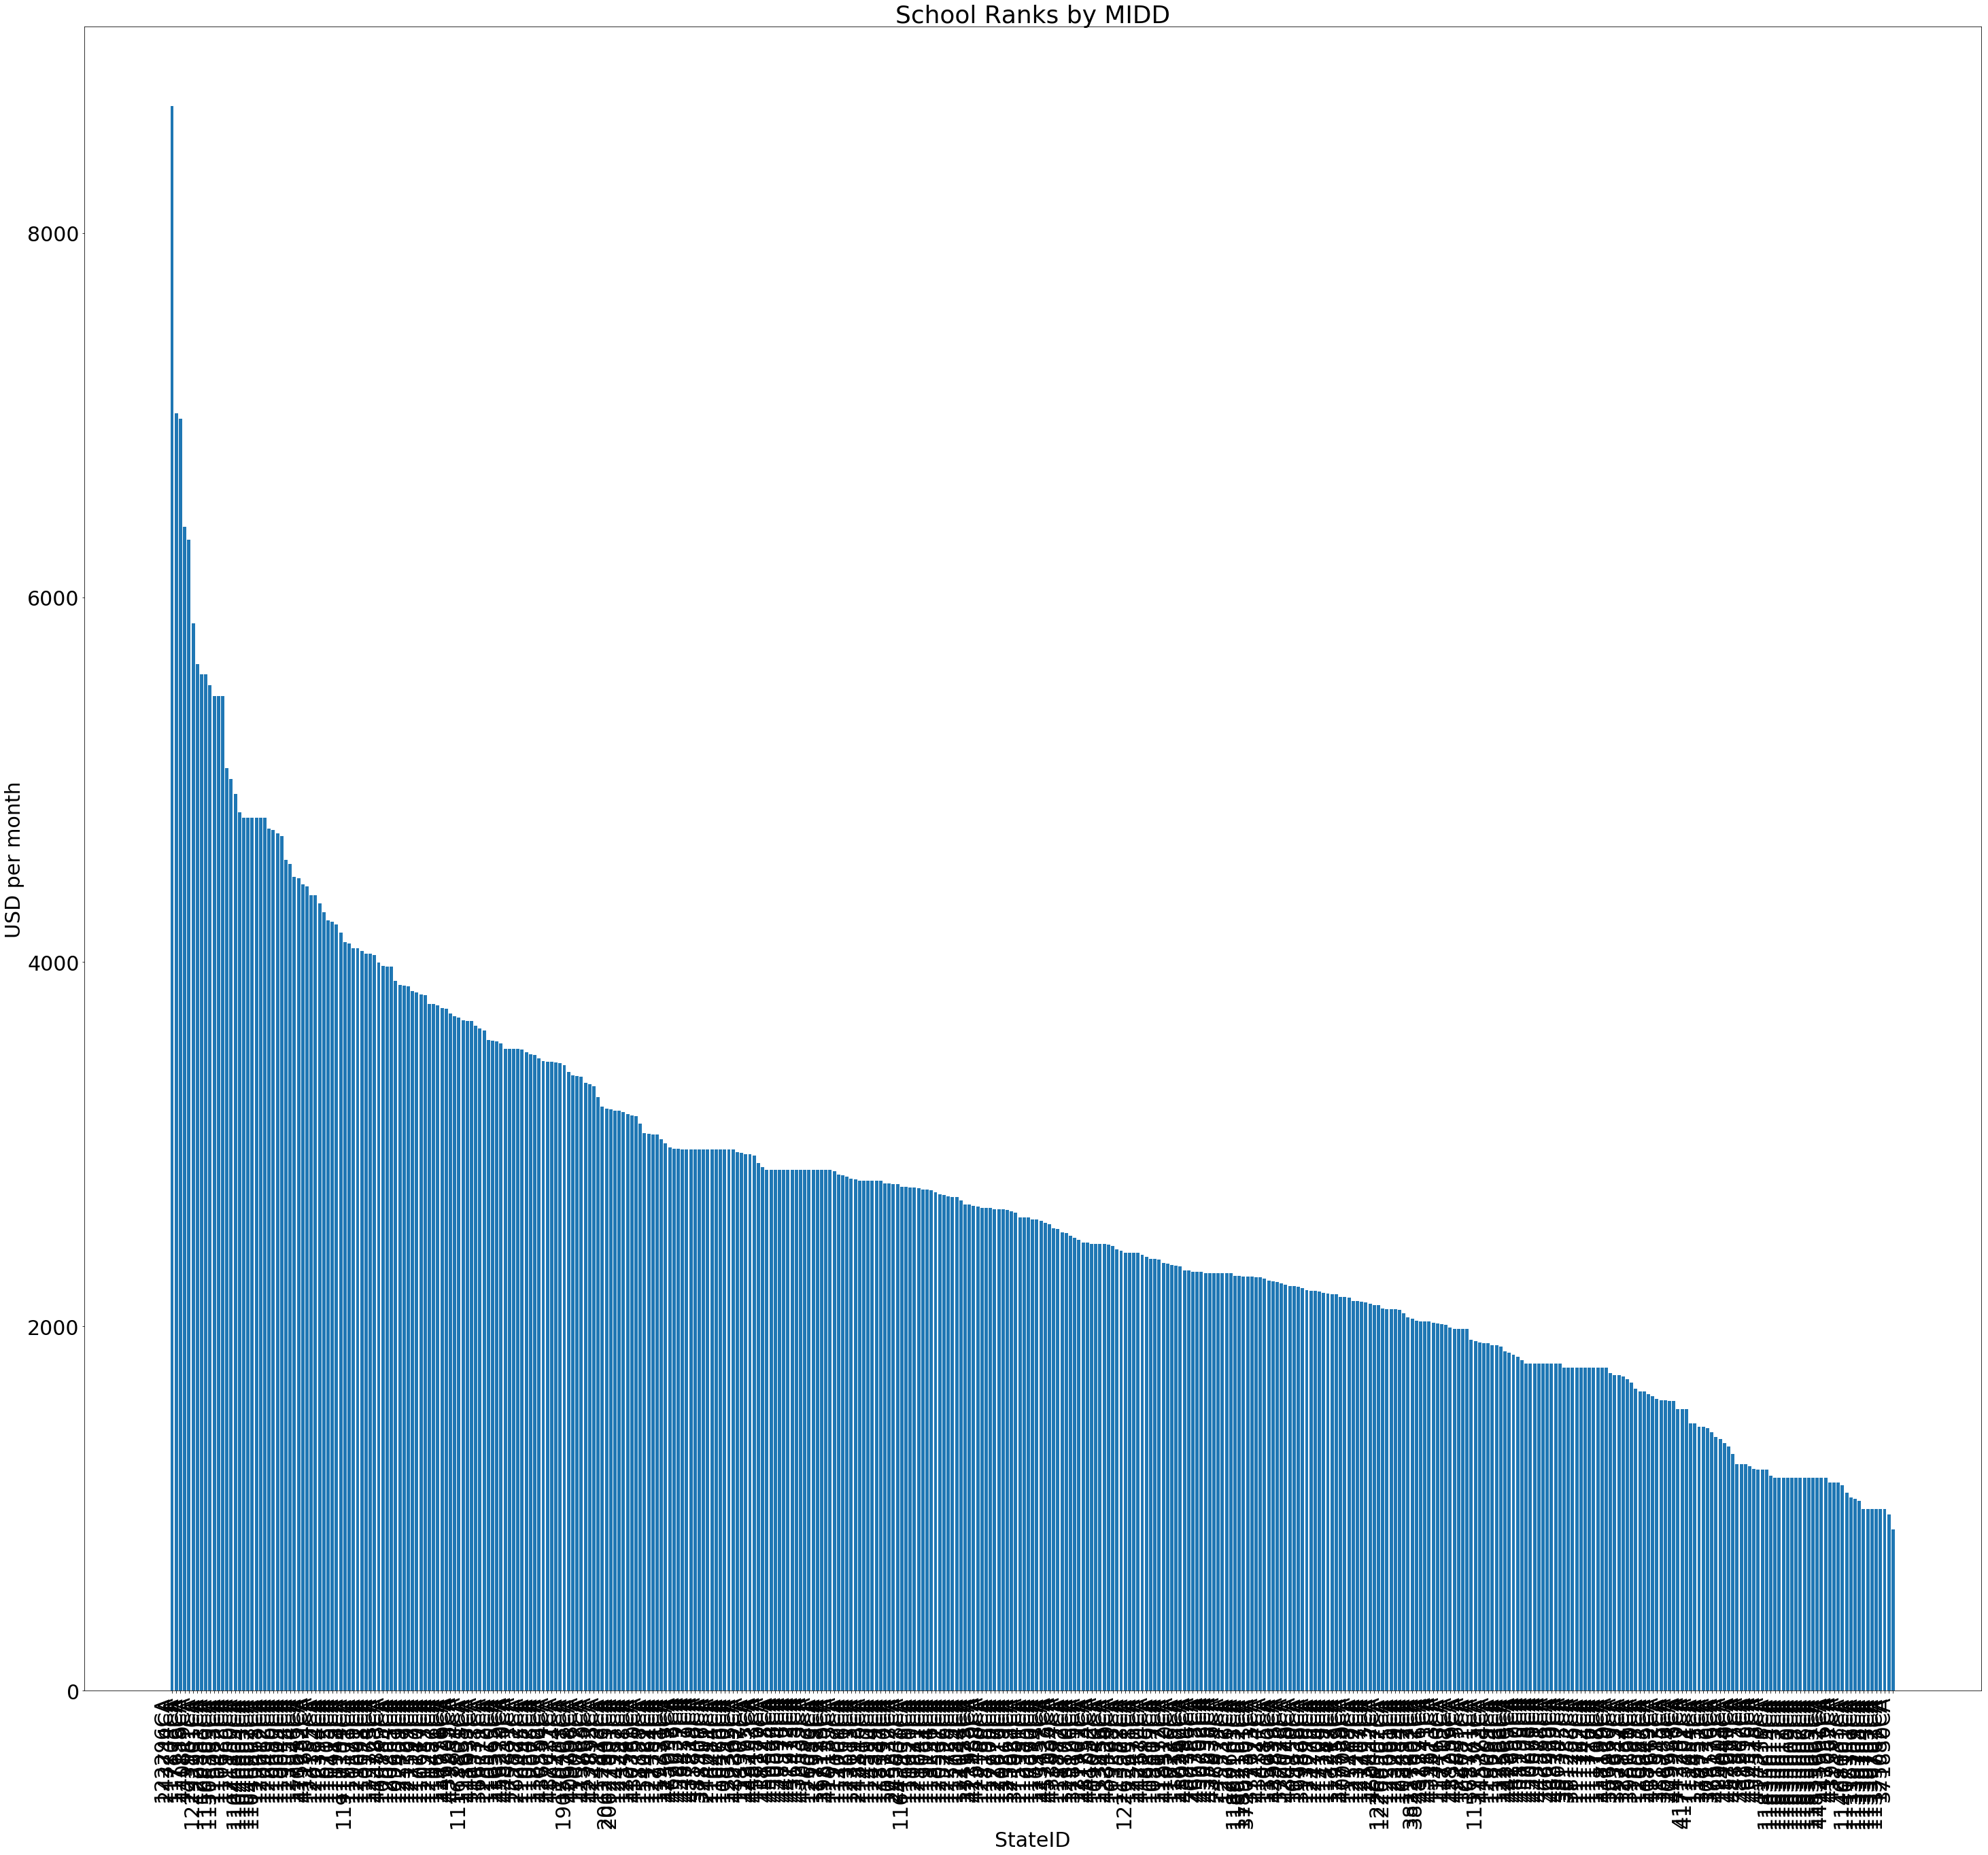

In [39]:
graph_of_monthly_income_difference(df,"CA")

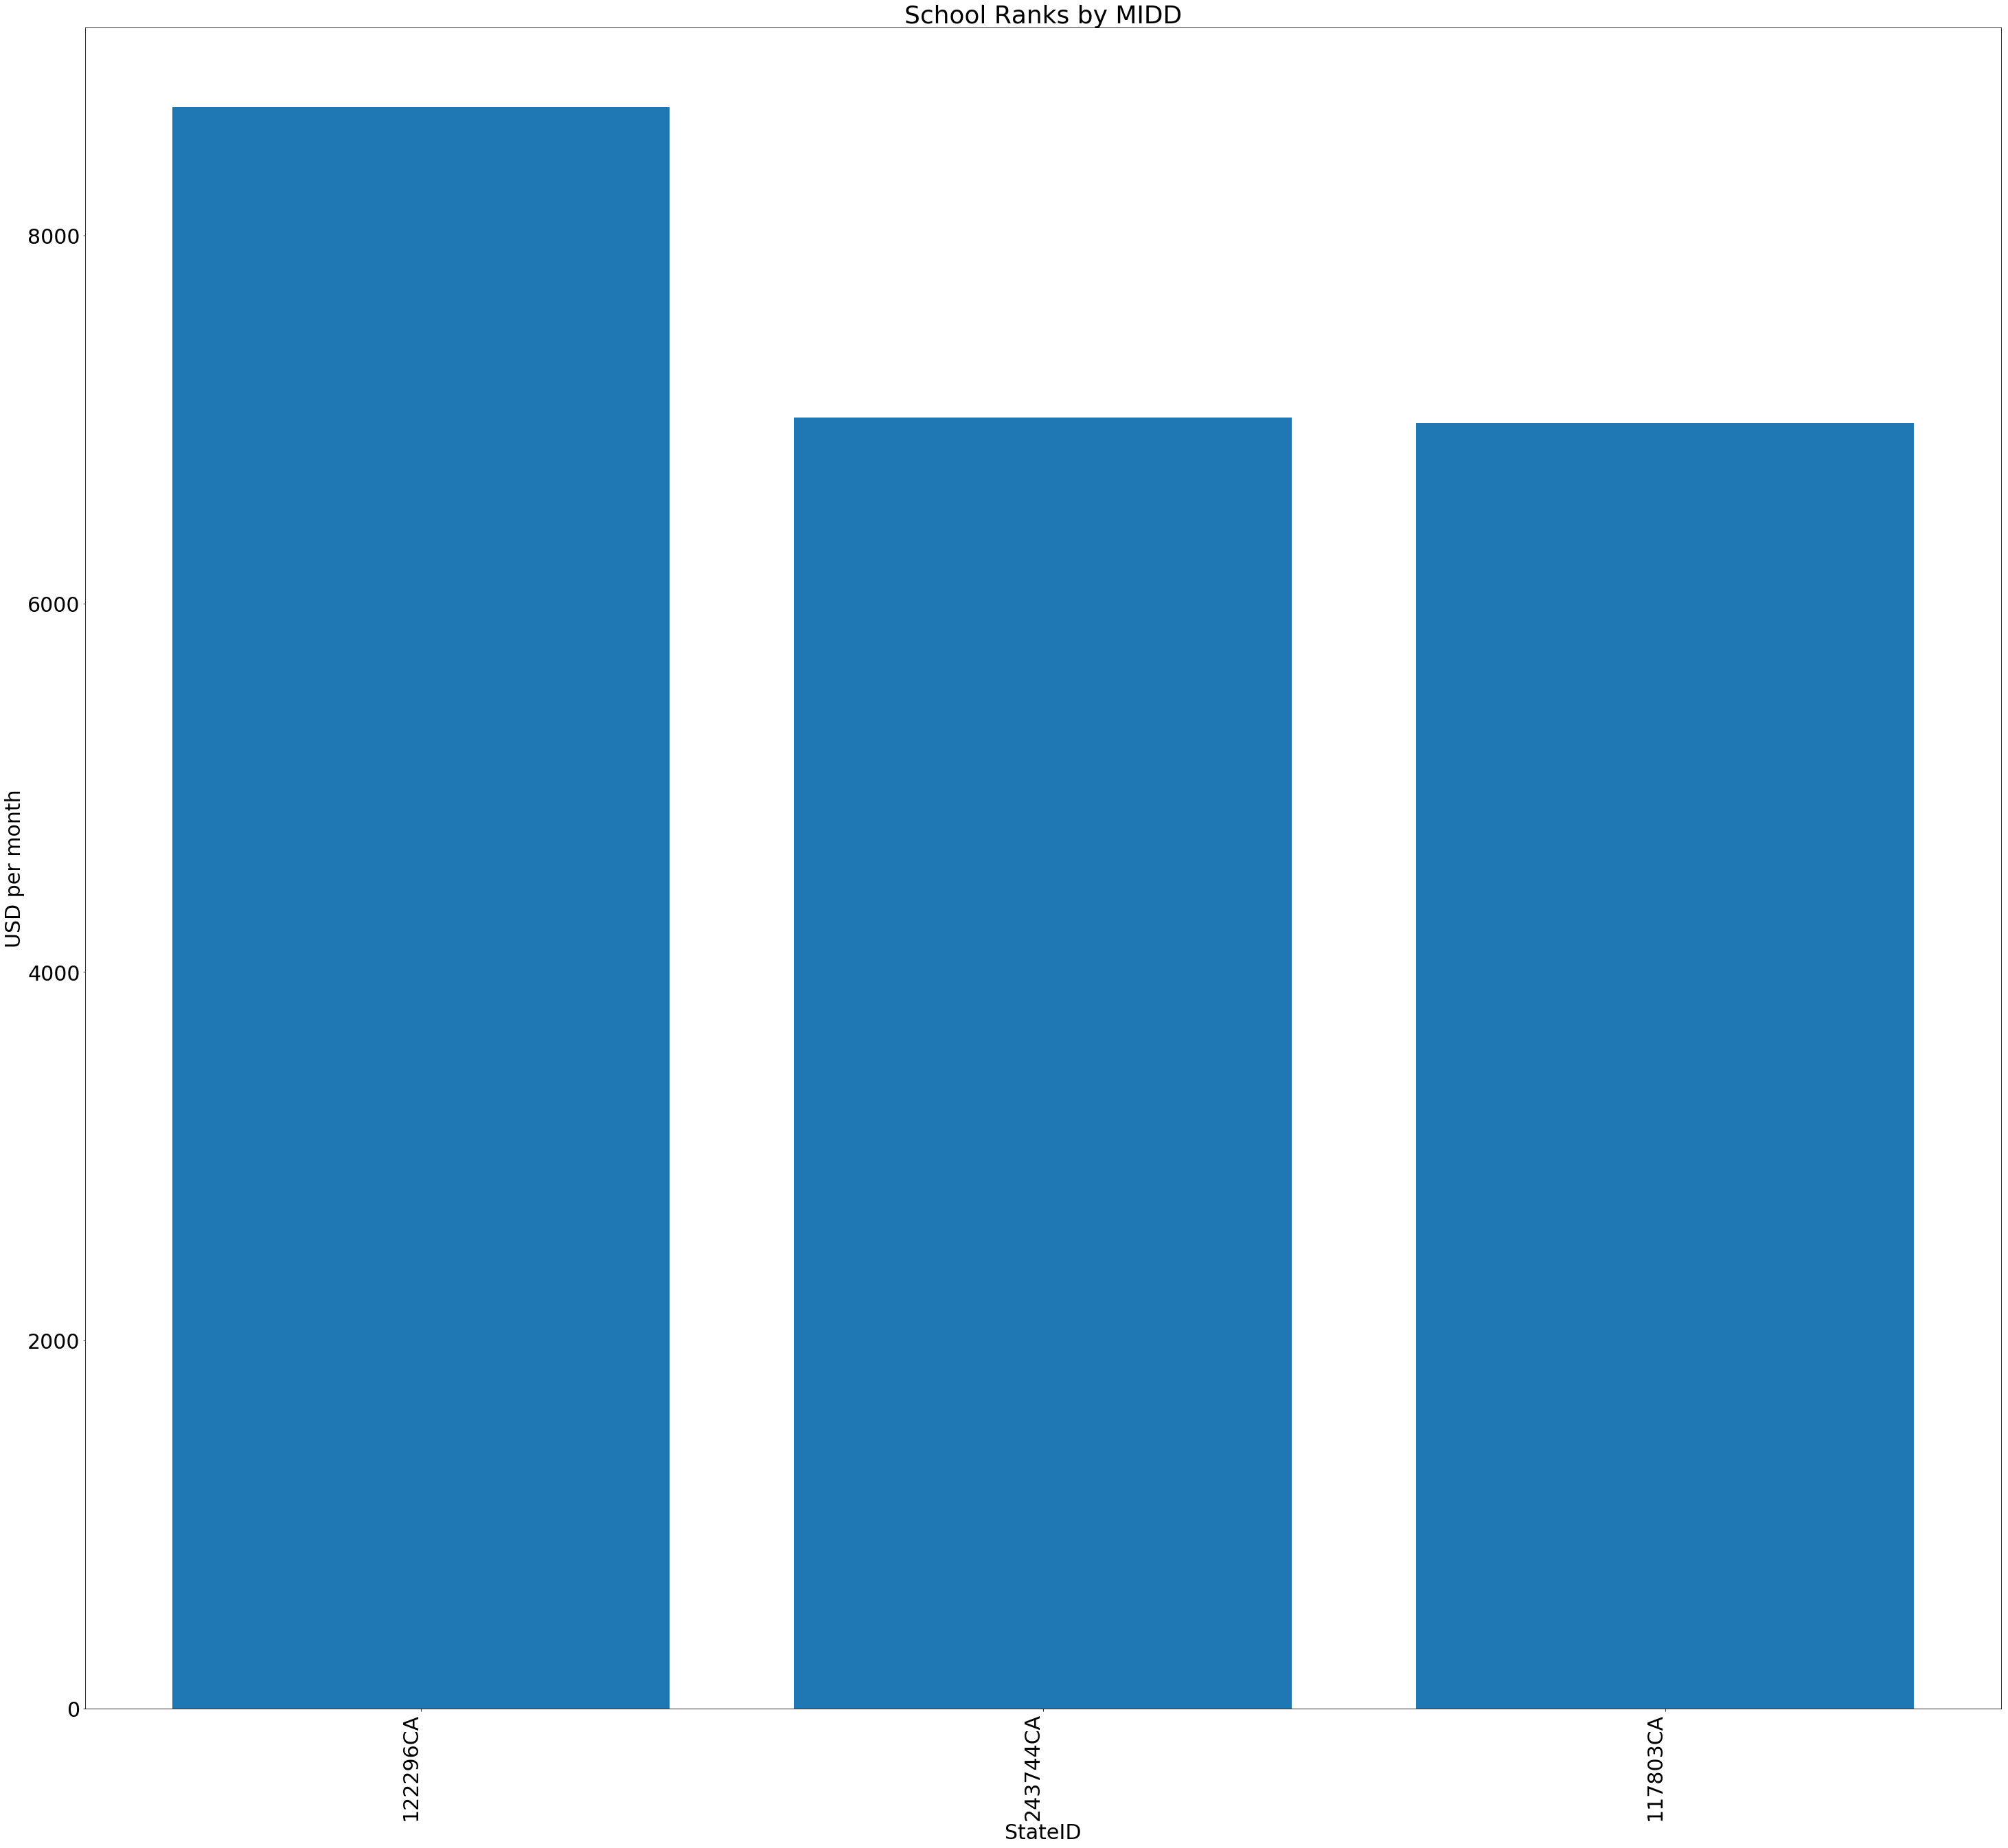

In [40]:
graph_of_monthly_income_difference(df,"CA",3)

In [41]:
df.loc[df["UNITID"] == 122296]

,UNITID,INSTNM,CITY,STABBR,MD_EARN_WNE_P10,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,Monthly_Income,Monthly_Income_Debt_Difference,StateID
315,122296,Samuel Merritt University,Oakland,CA,106700,193.870418,0.915152,8891.666667,8697.796249,122296CA


In [42]:
df.loc[df["UNITID"] == 166656]

,UNITID,INSTNM,CITY,STABBR,MD_EARN_WNE_P10,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,Monthly_Income,Monthly_Income_Debt_Difference,StateID
1249,166656,MCPHS University,Boston,MA,112700,279.173402,0.838226,9391.666667,9112.493265,166656MA


In [43]:
df.loc[df["UNITID"] == 101648]

,UNITID,INSTNM,CITY,STABBR,MD_EARN_WNE_P10,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,Monthly_Income,Monthly_Income_Debt_Difference,StateID
24,101648,Marion Military Institute,Marion,AL,45900,118.90719,0.557491,3825.0,3706.09281,101648AL


In [44]:
#Nursing, Pharmacology, Health Sciences for MA and CA
#Alabama's top school is a military institute

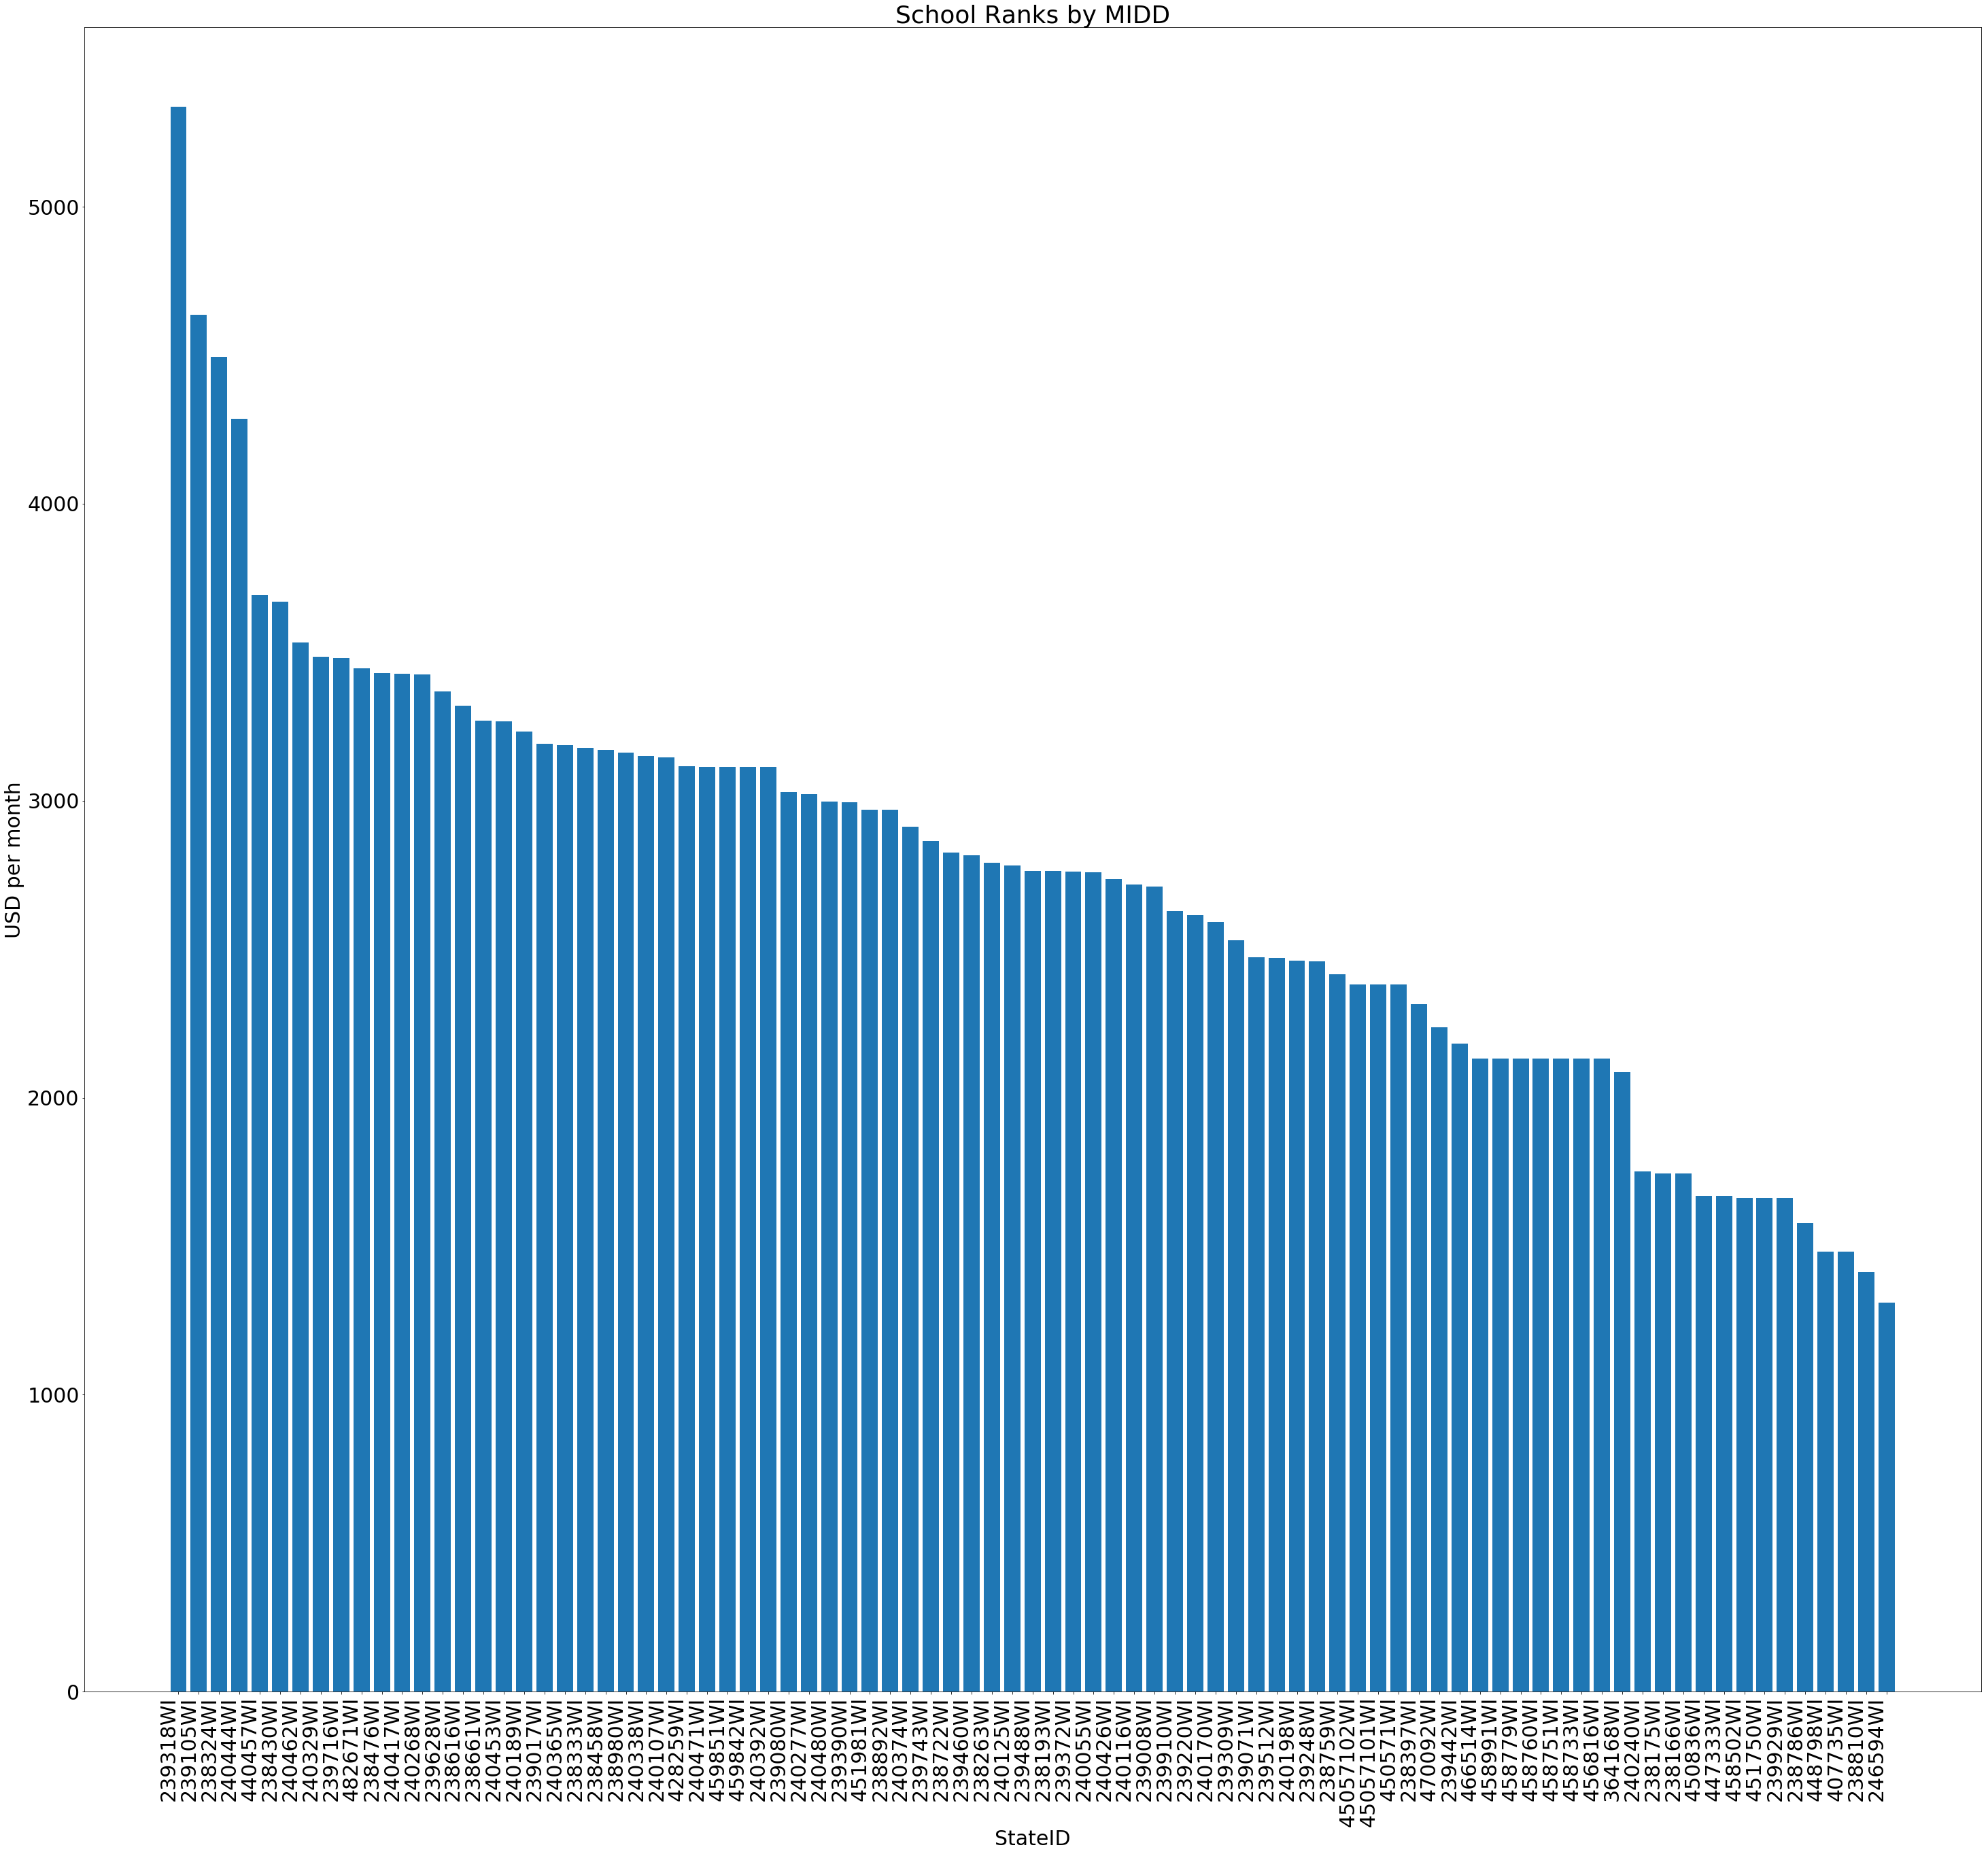

In [45]:
graph_of_monthly_income_difference(df,"WI")

In [46]:
df.loc[df["UNITID"] == 239318]

,UNITID,INSTNM,CITY,STABBR,MD_EARN_WNE_P10,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,Monthly_Income,Monthly_Income_Debt_Difference,StateID
3140,239318,Milwaukee School of Engineering,Milwaukee,WI,67400,279.173402,0.833048,5616.666667,5337.493265,239318WI


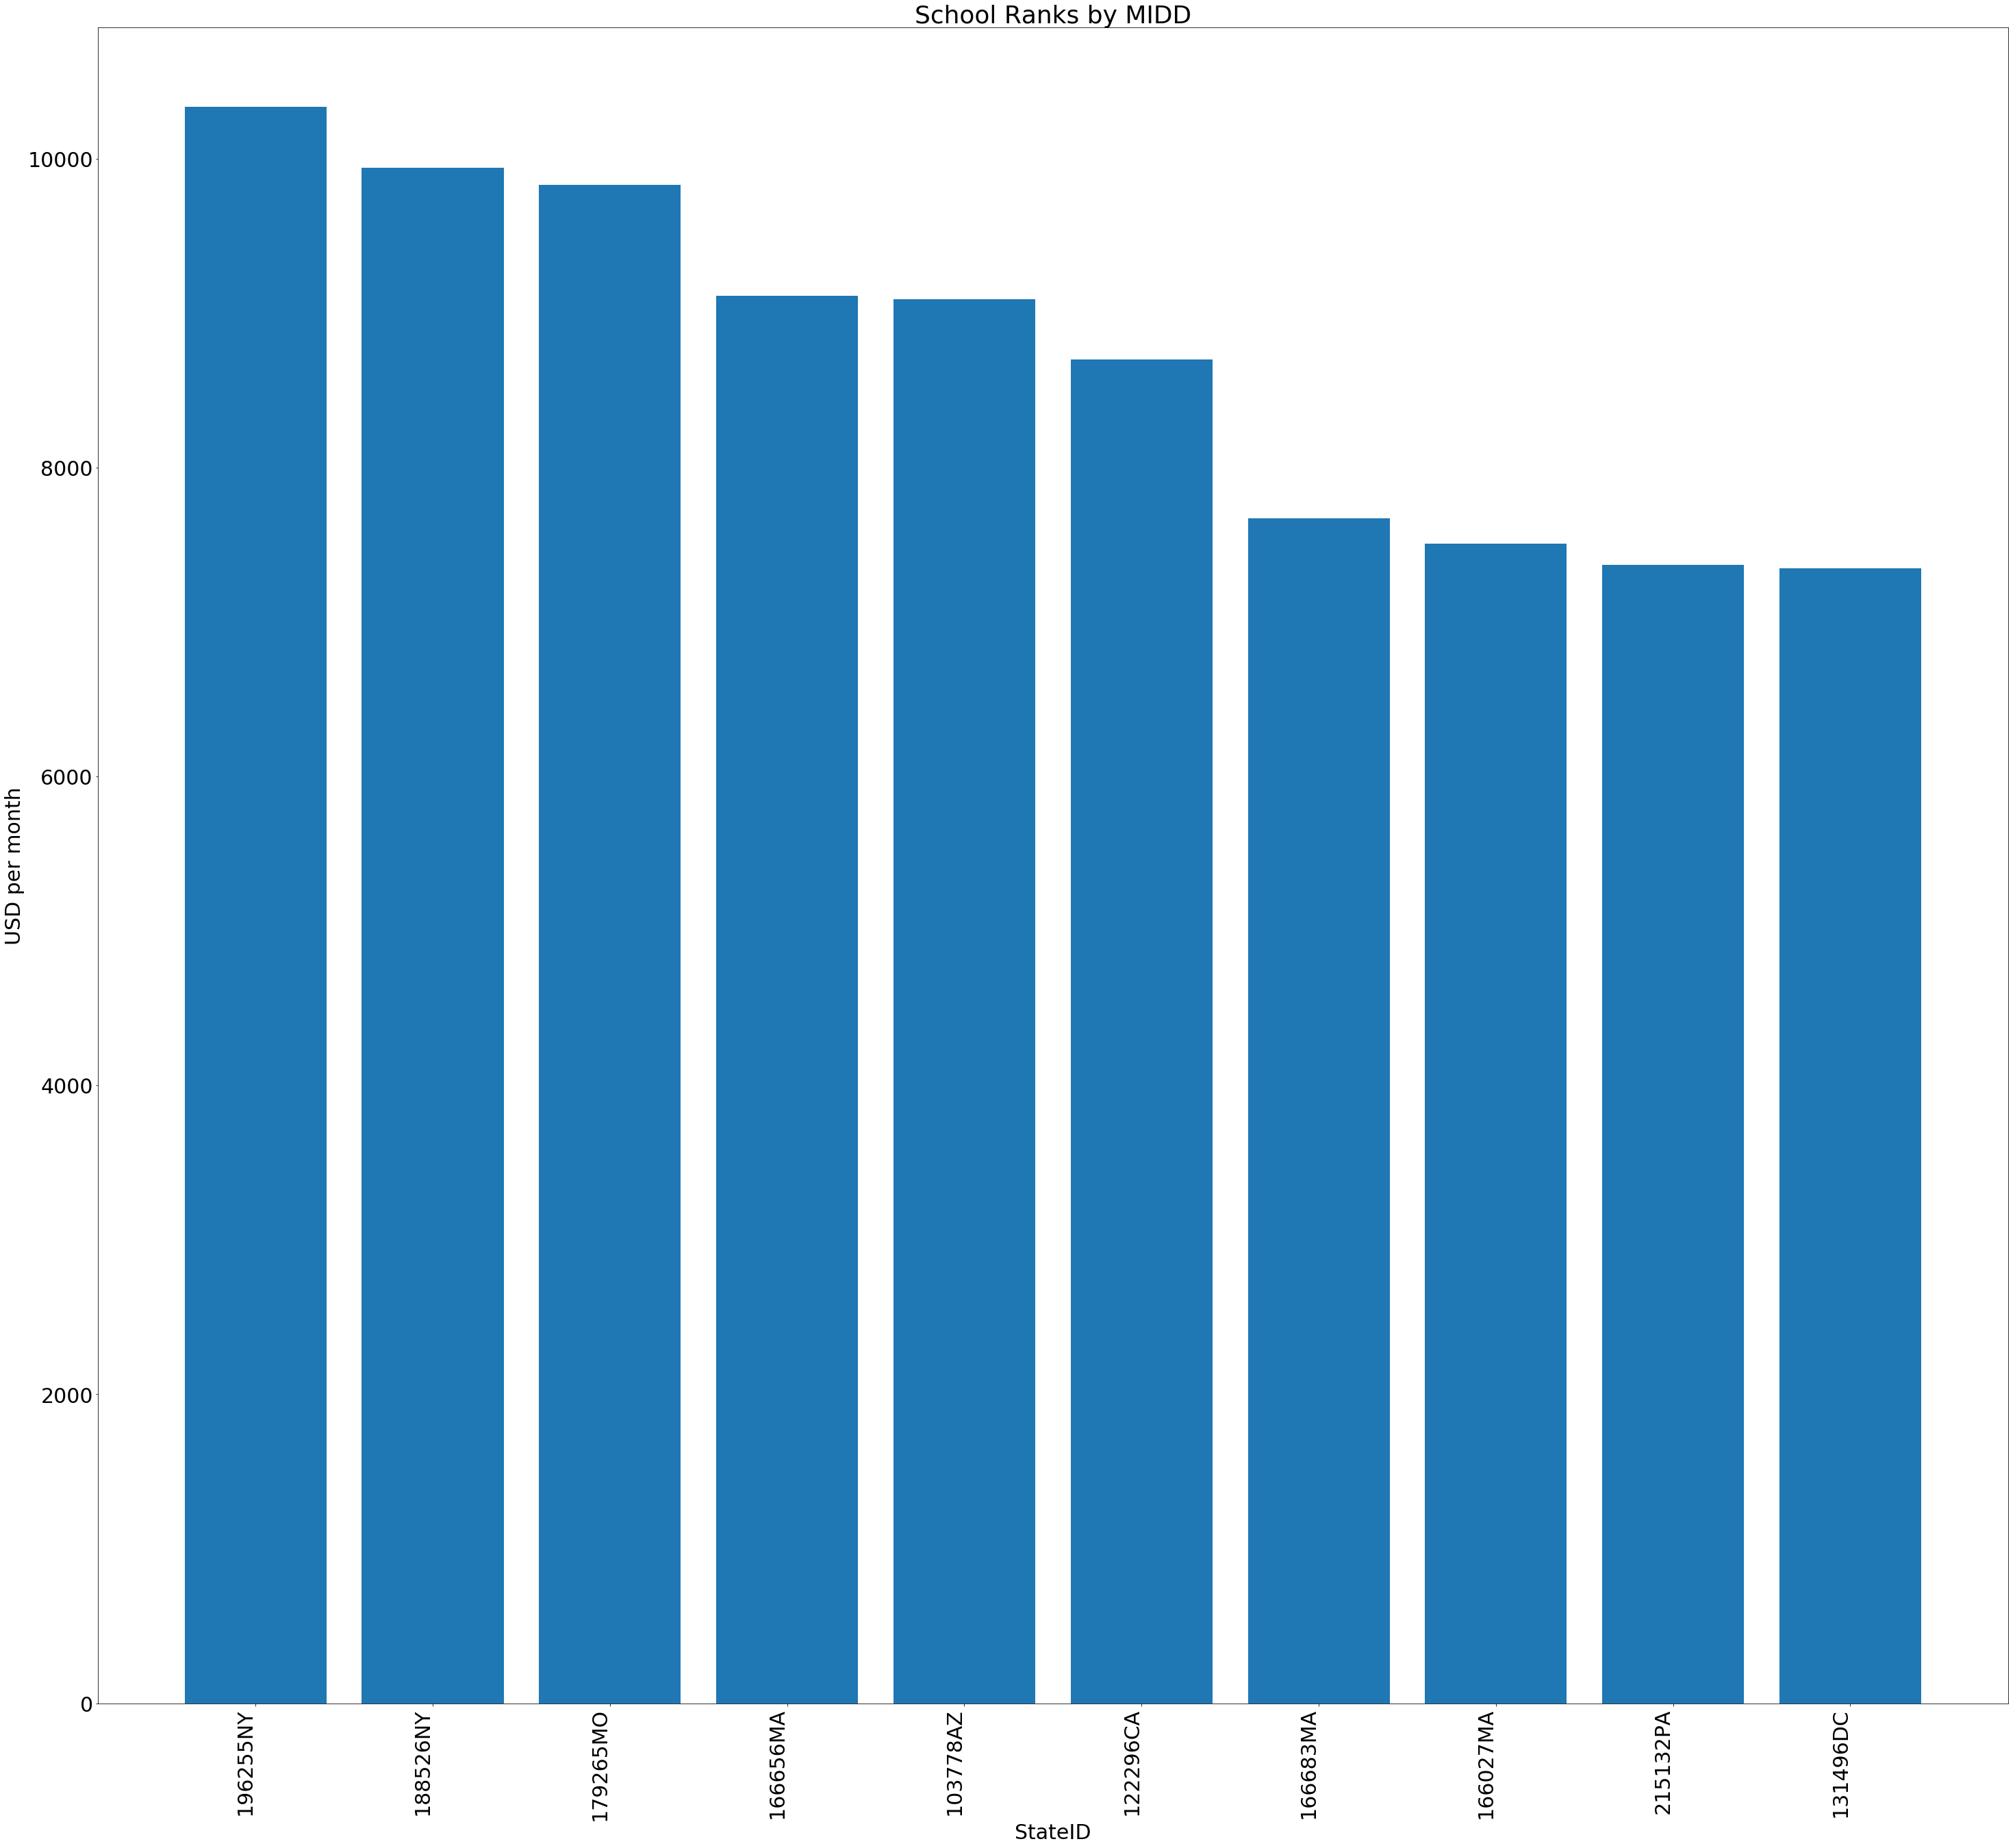

In [47]:
graph_of_monthly_income_difference(df,state="all",section=10)

In [48]:
df.loc[df["UNITID"] == 179265]

,UNITID,INSTNM,CITY,STABBR,MD_EARN_WNE_P10,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,Monthly_Income,Monthly_Income_Debt_Difference,StateID
1559,179265,St Louis College of Pharmacy,Saint Louis,MO,120400,201.625235,0.912181,10033.333333,9831.708099,179265MO


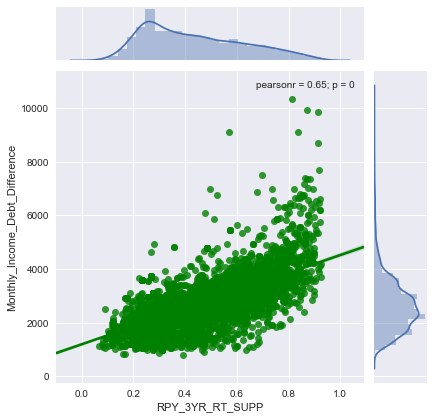

In [49]:
import seaborn as sns#; sns.set(style="white", color_codes=True)
sns.jointplot(x="RPY_3YR_RT_SUPP", y="Monthly_Income_Debt_Difference", data=df, kind='reg',
                  joint_kws={'color':'green'}) # Scatter and regression all green
sns.plt.show()

In [50]:
def make_heatmap(df):
    corr = df.corr()

    fig, ax = plt.subplots(figsize=(16,14))

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
    
    fig.autofmt_xdate(rotation="vertical")

    plt.show()

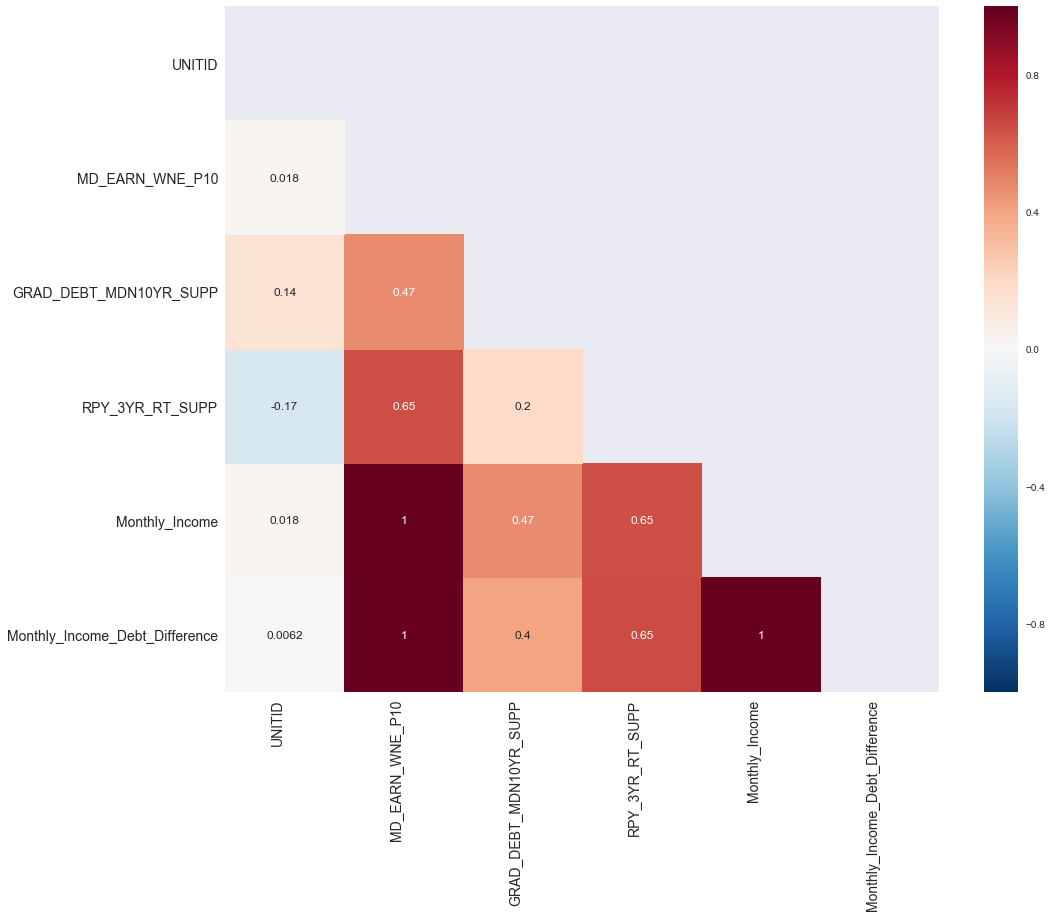

In [51]:
make_heatmap(df)

In [52]:
to_join = scorecard[['UGDS','UNITID']]

In [53]:
merged = pd.merge(df,to_join, on=['UNITID'])

In [54]:
merged.shape

(5005, 11)

In [55]:
merged.isnull().sum()

UNITID                              0
INSTNM                              0
CITY                                0
STABBR                              0
MD_EARN_WNE_P10                     0
GRAD_DEBT_MDN10YR_SUPP              0
RPY_3YR_RT_SUPP                     0
Monthly_Income                      0
Monthly_Income_Debt_Difference      0
StateID                             0
UGDS                              341
dtype: int64

In [56]:
merged = merged.loc[merged['UGDS'].isnull() == False]

In [57]:
merged.shape

(4664, 11)

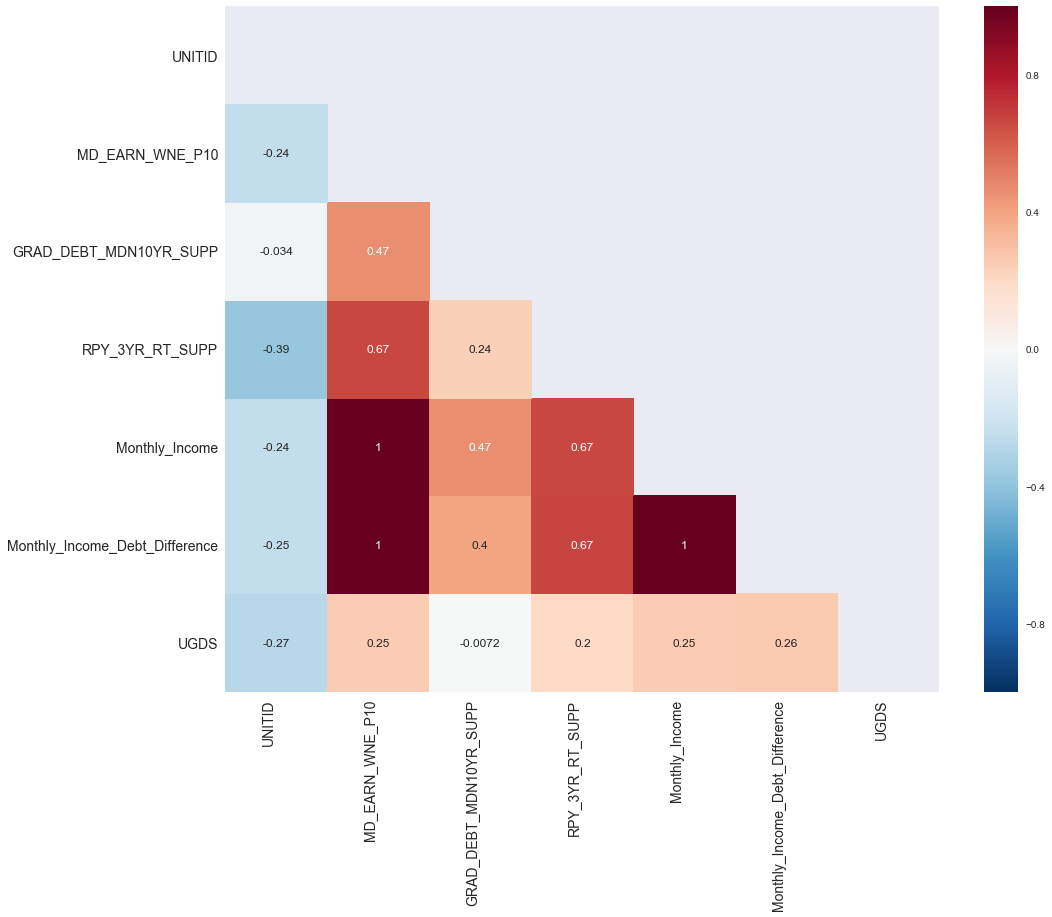

In [58]:
make_heatmap(merged)

In [59]:
to_merge = scorecard[['UNITID','PPTUG_EF']]

In [60]:
merged

,UNITID,INSTNM,CITY,STABBR,MD_EARN_WNE_P10,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,Monthly_Income,Monthly_Income_Debt_Difference,StateID,UGDS
0,100654,Alabama A & M University,Normal,AL,29900,361.891447,0.245850,2491.666667,2129.775220,100654AL,4505.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,40200,222.304746,0.519911,3350.000000,3127.695254,100663AL,11269.0
2,100690,Amridge University,Montgomery,AL,40100,237.814379,0.233100,3341.666667,3103.852287,100690AL,308.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,45600,242.984257,0.549003,3800.000000,3557.015743,100706AL,5829.0
4,100724,Alabama State University,Montgomery,AL,26700,331.813098,0.196354,2225.000000,1893.186902,100724AL,4740.0
5,100751,The University of Alabama,Tuscaloosa,AL,42700,245.569196,0.591143,3558.333333,3312.764137,100751AL,31005.0
6,100760,Central Alabama Community College,Alexander City,AL,27200,97.069626,0.263502,2266.666667,2169.597041,100760AL,1546.0
7,100812,Athens State University,Athens,AL,38500,191.637031,0.494246,3208.333333,3016.696303,100812AL,2904.0
8,100830,Auburn University at Montgomery,Montgomery,AL,33500,229.465027,0.416270,2791.666667,2562.201640,100830AL,4142.0
9,100858,Auburn University,Auburn,AL,47100,222.304746,0.731667,3925.000000,3702.695254,100858AL,21551.0


In [61]:
merged = pd.merge(merged,to_merge, on=['UNITID'])

In [62]:
merged.shape

(4664, 12)

In [63]:
merged.isnull().sum()

UNITID                            0
INSTNM                            0
CITY                              0
STABBR                            0
MD_EARN_WNE_P10                   0
GRAD_DEBT_MDN10YR_SUPP            0
RPY_3YR_RT_SUPP                   0
Monthly_Income                    0
Monthly_Income_Debt_Difference    0
StateID                           0
UGDS                              0
PPTUG_EF                          3
dtype: int64

In [64]:
merged = merged.loc[merged['PPTUG_EF'].isnull() == False]

In [65]:
merged.shape

(4661, 12)

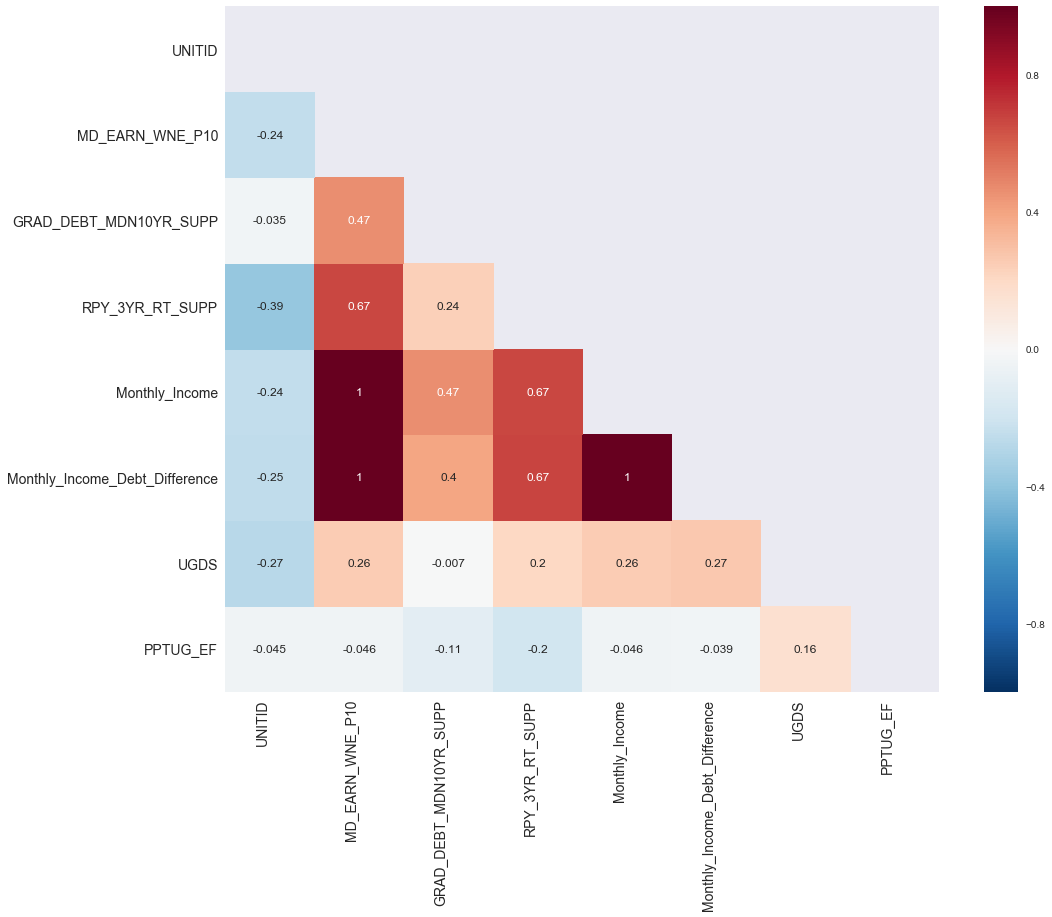

In [66]:
make_heatmap(merged)

In [67]:
#fraction of part time students, as it goes up the chance of paying
#student loans goes down, hence it shows a negative correlation.

In [68]:
X = merged[['Monthly_Income','UGDS','PPTUG_EF']]
y = merged['RPY_3YR_RT_SUPP']

In [69]:
lin_reg = LinearRegression()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [71]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
lin_reg.score(X_test,y_test)

0.48499215449268923

In [73]:
#the model explains about half the variance that is going on 

In [74]:
#specialized vs. general schools (number of programs)
#undergrad vs. grad

In [75]:
df.to_csv("college_rank_analysis.csv", index=False)